NetAn
================

About NetAn
-------------
Gene annotation enrichment analysis is the gold standard to study the biological context of a set of genes, but available tools often overlooks important network properties of the gene regulatory system. We introduce the Network Annotation Enrichment package, NetAn, which takes a list of genes and uses network-based approaches such as network clustering and inference of closely related genes to include local neighbours. Using NetAn, we exemplify how these approaches can be used to better identify relevant annotations in human gene sets. 

Usage
----------
Here, we assume a list of six genes, that will be subject to analysis


In [1]:
import sys
sys.path.append('../utils')

import NetAn
import plot_utils

/home/rasmus/Documents/projects/NetAn_package/
/home/rasmus/Documents/projects/NetAn_package/


In [2]:
genes = ['INSR', 'IRS1', 'RICTOR', 'ACT1', 'F13A1', 'SERPINC1']

We next create a NetAn object. By default, this also loads the STRINGdb network as the default network for analysis.

In [3]:
nt = NetAn.NetAn(genes)

### Expanding the gene set
The nt object can now be used to, as an example, expand the genes into including also the neighbouring genes on a PPI network. Here, we expand with a factor 1 relative to the six input genes, brining the total up to 12 genes.

In [4]:
nt.add_close_genes(augment_factor=1)
print('The added genes are: ', nt.genes_exp)

1 of 6 genes are not in network
The added genes are:  ['CXorf65' 'OR4F17' 'OR5B17' 'OR6B1' 'SH2B2' 'P3R3URF']


Now, we calculate the enrichments of all the genes, and compare to the corresponding overenrichment analysis of the original sig genes.


In [5]:
full_OR = nt.enrich(gene_set='genes_exp')
start_OR = nt.enrich(gene_set='start_genes')

Calculating Fisher test
Calculating Fisher test


,OR,pval,p_adj
olfactory receptor activity,49.794457,0.000148,0.157699
detection of chemical stimulus involved in sensory perception of smell,49.560920,0.000150,0.157699
G protein-coupled receptor activity,30.510029,0.000599,0.420443
G protein-coupled receptor signaling pathway,22.522995,0.001403,0.737745
phosphatidylinositol 3-kinase complex,219.740000,0.005714,1.000000
...,...,...,...
fibroblast growth factor binding,0.000000,1.000000,1.000000
fibrillar center,0.000000,1.000000,1.000000
fertilization,0.000000,1.000000,1.000000
female pregnancy,0.000000,1.000000,1.000000


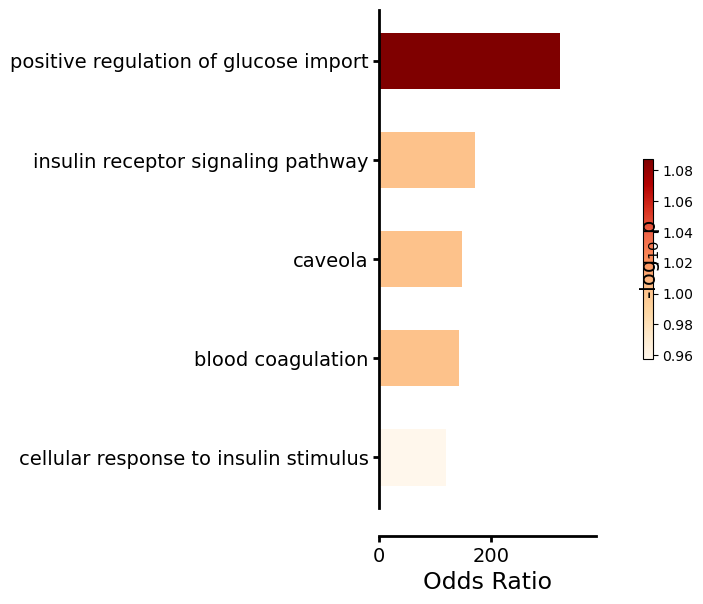

In [6]:
plot_utils.plot_enrichments(start_OR, sorton='pval')
full_OR

### Clustering the gene sets
The six input genes were chosen to include two separate processes, related to blood coagulation and insulin stimulation. Now, we will test to see how the annotations changes when we instead go for two clusters. 

In [7]:
cluster_res = nt.enrich(n_clusters=2)
plot_utils.plot_enrichment_clusters(cluster_res, sorton='pval')

Calculating Fisher test
Calculating Fisher test


### Analysing cluster distances 
Lastly, we test how far apart the two identified clusters are on the input network

In [13]:
dists, pvals = nt.get_cluster_distances()
print(dists)

Building graph in networkx
Lost  0.0 of genes by comparing with the largest connected component of the network
0 0
0 1
1 1
[[0.24350649 0.97402597]
 [0.97402597 0.32467532]]


In the 'dists' variable, we now see a matrix of the average shortest path between genes in each cluster, normed by the average shortest path in the network. Furthermore, on the diagonal is the average shortest path within the cluster. A number close to 1 means that the clusters are relativly unrelated. We chose input genes that are related to coagulation or insulin response, which we now as expected find to make two comparatively unrelated clusters on the input network. 